# Analisis de Sentimientos con Redes Neuronales

Basado en el proyecto de redes neuronales de la diabetes visto en clases.

Fecha: 2025-09-20

Author Omar Velez

### 🚀 Idea Fuerza: 

**Se desarrolla una red neuronal, entrenada con mensajes y que clasifica la polaridad emocional para comprender el sentimiento de un mensaje de texto.**

# Motivación

La motivación para realizar es proyecto es de un hecho que escuche recientemente en un programa radial [Primera Plana](https://youtu.be/3mmv8YDSfVk?si=vjmshyQaMoen9wgs&t=1651), en donde se presentaba el análisis del clima social expresado en las redes sociales.


![image](./Documentos/hq720.jpg)


A partir de este punto me queda la duda de como estas empresas [Golden Social Suite](https://www.gosocialsuite.com/es) de México, brinda el servicio y si este podría ser repetible o como se haría el mismo.

Además, preparar un demo con Redes Neuronales Vs. Inteligencia Artificial, como parte de la entrega final del módulo de **Fundamentos de Inteligencia Artificial**

### Sitios de Referencia

- [💌 Análisis de Sentimientos con IA](https://omargo33-finalstreamlit-modelo-sentimientos-app-bnuiha.streamlit.app/)
- [Calculadora de token](https://www.jotform.com/es/ai/token-calculator/)
- [Natural Languaje Toolkit](https://www.nltk.org/)
- [Mi Git](https://github.com/omargo33/FinalStreamlit)
- [Deepseek Plataform](https://platform.deepseek.com/usage)

In [ ]:
# Librerías necesarias
!%pip install pandas matplotlib seaborn scikit-learn tensorflow nltk wordcloud

/bin/bash: línea 1: fg: no hay control de trabajos


In [27]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
## import re
import tensorflow as tf

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

## ⚡ Descargar recursos de NLTK

> Kit de herramientas de lenguaje natural
>NLTK es una plataforma líder para crear programas Python que trabajan con datos de lenguaje humano. Ofrece interfaces fáciles de usar para más de 50 corpus y recursos léxicos como WordNet, además de un conjunto de bibliotecas de procesamiento de texto para clasificación, tokenización, lematización, etiquetado, análisis sintáctico y razonamiento semántico, contenedores para bibliotecas de PLN de alto rendimiento y un foro de discusión activo.> obtenido desde el sitio oficial del API

Dataset creado:
                              texto sentimiento
0       Me encanta este día soleado    positivo
1  Estoy muy triste por lo que pasó    negativo
2   ¡Qué alegría tan grande siento!    positivo
3               Esto me enoja mucho    negativo
4      Me siento neutro al respecto      neutro


[nltk_data] Downloading package stopwords to /home/ovelez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


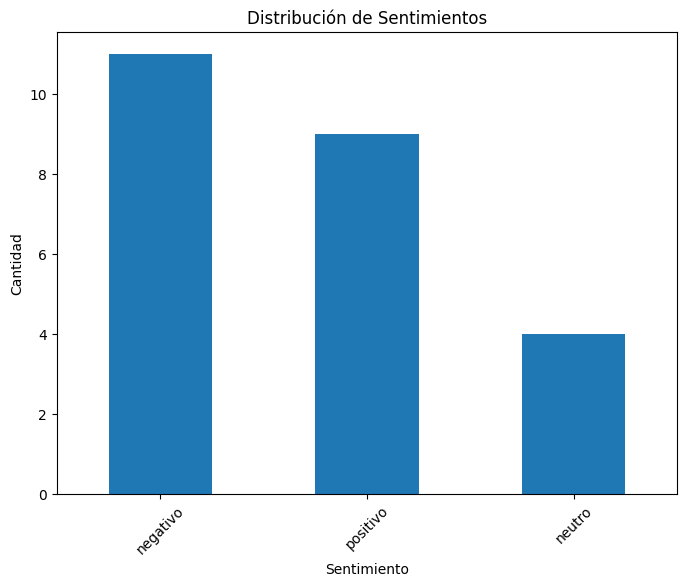

In [28]:
nltk.download("stopwords")

#
# Crear un dataset de ejemplo de análisis de sentimientos, se usa un ejemplo para ser publicado
data = {
    "texto": [
        "Me encanta este día soleado",
        "Estoy muy triste por lo que pasó",
        "¡Qué alegría tan grande siento!",
        "Esto me enoja mucho",
        "Me siento neutro al respecto",
        "Es un día hermoso para estar vivo",
        "Odio cuando llueve tanto",
        "Me da igual lo que pase",
        "Estoy emocionado por el viaje",
        "Qué aburrido es este lugar",
        "Amo pasar tiempo con mi familia",
        "Me entristece ver esto",
        "Es increíblemente fantástico",
        "No me gusta nada esto",
        "Está bien, supongo",
        "Este poema me llena de felicidad",
        "Las palabras duelen como espinas",
        "Siento paz en mi corazón",
        "La ira consume mi alma",
        "No me importa lo que pase",
        "Este poema me llena de alegría como el sol de la mañana",
        "Las palabras cortantes hieren mi alma profundamente",
        "Tengo poca suerte",
        "Todo me parece igual hoy"
    ],
    "sentimiento": [
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "neutro",
        "positivo",
        "negativo",
        "neutro",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "neutro",
        "positivo",
        "negativo",
        "positivo",
        "negativo",
        "negativo",
        "positivo",
        "negativo",
        "negativo",        
        "neutro",
    ],
}

#
# Instanciamos un dataframe
sentimientos_df = pd.DataFrame(data)
print("Dataset creado:")
print(sentimientos_df.head())

# Visualizar distribución de sentimientos
plt.figure(figsize=(8, 6))
sentimientos_df["sentimiento"].value_counts().plot(kind="bar")
plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()


### Preprocesamiento de texto

Funcion de procesamiento de texto y normaliza un poco el texto para que sea mas estable la consulta

In [29]:
def limpiar_texto(texto):
    """Función para limpiar y preprocesar el texto"""
    # Convertir a minúsculas
    texto = texto.lower()

    # Eliminar caracteres especiales y números
    texto = re.sub(r"[^a-záéíóúüñ\s]", "", texto)

    # Eliminar espacios extra
    texto = " ".join(texto.split())

    return texto


# Aplicar limpieza de texto
sentimientos_df["texto_limpio"] = sentimientos_df["texto"].apply(limpiar_texto)

# Codificar etiquetas de sentimiento
label_encoder = LabelEncoder()
sentimientos_df["sentimiento_encoded"] = label_encoder.fit_transform(
    sentimientos_df["sentimiento"]
)

print("Texto limpio y etiquetas codificadas:")
print(sentimientos_df[["texto_limpio", "sentimiento", "sentimiento_encoded"]].head())

# Mapeo de etiquetas
label_map = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
)
print(f"\nMapeo de etiquetas: {label_map}")

Texto limpio y etiquetas codificadas:
                       texto_limpio sentimiento  sentimiento_encoded
0       me encanta este día soleado    positivo                    2
1  estoy muy triste por lo que pasó    negativo                    0
2     qué alegría tan grande siento    positivo                    2
3               esto me enoja mucho    negativo                    0
4      me siento neutro al respecto      neutro                    1

Mapeo de etiquetas: {'negativo': np.int64(0), 'neutro': np.int64(1), 'positivo': np.int64(2)}


### Tokenización y secuencias

Configuración para tokenización

In [30]:
MAX_WORDS = 1000  # Vocabulario máximo
MAX_SEQUENCE_LENGTH = 50  # Longitud máxima de secuencia

# Tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(sentimientos_df["texto_limpio"])

# Convertir texto a secuencias numéricas
sequences = tokenizer.texts_to_sequences(sentimientos_df["texto_limpio"])

# Padding para que todas las secuencias tengan la misma longitud
X_padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding="post")

print(f"Forma de X después del padding: {X_padded.shape}")
print(f"Ejemplo de secuencia: {X_padded[0]}")

# Preparar variables X e y
X_sentimientos = X_padded
y_sentimientos = tf.keras.utils.to_categorical(
    sentimientos_df["sentimiento_encoded"], num_classes=3
)

print(f"Forma de X: {X_sentimientos.shape}")
print(f"Forma de y: {y_sentimientos.shape}")

Forma de X después del padding: (24, 50)
Ejemplo de secuencia: [ 2 27  3 11 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
Forma de X: (24, 50)
Forma de y: (24, 3)


### Función para crear modelo de sentimientos (basada en código de diabetes)

**num_capas:** número de capas ocultas (1, 2, o 3)

**neuronas_capa1:** número de neuronas en la primera capa oculta

**neuronas_capa2:** número de neuronas en la segunda capa oculta

**optimizer:** optimizador a usar ('adam', 'sgd', 'rmsprop')

**activation:** función de activación ('relu', 'tanh', 'sigmoid')

**dropout_rate:** tasa de dropout para regularización

In [31]:

def crear_modelo_sentimientos(
    num_capas=2,
    neuronas_capa1=64,
    neuronas_capa2=32,
    optimizer="adam",
    activation="relu",
    dropout_rate=0.3,
):
    model = Sequential()

    # Capa de embedding para representación de palabras
    model.add(
        Embedding(input_dim=MAX_WORDS, output_dim=50, input_length=MAX_SEQUENCE_LENGTH)
    )

    # Capa LSTM para capturar patrones secuenciales
    model.add(LSTM(32, return_sequences=False))

    # Primera capa densa (siempre presente)
    model.add(Dense(neuronas_capa1, activation=activation))
    model.add(Dropout(dropout_rate))

    # Segunda capa (si num_capas >= 2)
    if num_capas >= 2:
        model.add(Dense(neuronas_capa2, activation=activation))
        model.add(Dropout(dropout_rate))

    # Tercera capa (si num_capas >= 3)
    if num_capas >= 3:
        model.add(Dense(neuronas_capa2 // 2, activation=activation))
        model.add(Dropout(dropout_rate))

    # Capa de salida (3 clases: positivo, negativo, neutro)
    model.add(Dense(3, activation="softmax"))

    # Compilar el modelo
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

    return model

### Entrenamiento y evaluación del modelo

Dividir datos en entrenamiento y prueba (similar a el codigo de la  diabetes)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sentimientos,
    y_sentimientos,
    test_size=0.3,
    random_state=42,
    stratify=y_sentimientos,
)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

# Crear modelo
modelo_sentimientos = crear_modelo_sentimientos(
    num_capas=2,
    neuronas_capa1=64,
    neuronas_capa2=32,
    optimizer="adam",
    activation="relu",
)

# Resumen del modelo
modelo_sentimientos.summary()

Datos de entrenamiento: (16, 50)
Datos de prueba: (8, 50)


/home/ovelez/Documentos/cursos/Maestria/modulo1/ejerciciosPhyton/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento con Early Stopping

Early stopping para evitar <sobreajuste> 

In [33]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10, monitor="val_loss", restore_best_weights=True
)

# Entrenar el modelo
print("Entrenando modelo de análisis de sentimientos...")
history = modelo_sentimientos.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1,
)


Entrenando modelo de análisis de sentimientos...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 1.0961 - val_accuracy: 0.3750 - val_loss: 1.0926
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3125 - loss: 1.0894 - val_accuracy: 0.3750 - val_loss: 1.0897
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 1.0840 - val_accuracy: 0.3750 - val_loss: 1.0861
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4375 - loss: 1.0799 - val_accuracy: 0.3750 - val_loss: 1.0815
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4375 - loss: 1.1005 - val_accuracy: 0.3750 - val_loss: 1.0775
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3125 - loss: 1.0794 - val_accuracy: 0.3750 - val_loss: 1.0732
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4375 - loss: 1.0827 - val_accuracy: 0.3750 - val_loss: 1.0688
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3125 - 

### Evaluacion del modelo

Evaluación (similar a código de diabetes)

In [38]:
train_scores = modelo_sentimientos.evaluate(X_train, y_train, verbose=0)
test_scores = modelo_sentimientos.evaluate(X_test, y_test, verbose=0)

print(f"Precisión en entrenamiento: {train_scores[1] * 100:.2f}%")
print(f"Precisión en prueba: {test_scores[1] * 100:.2f}%")
print(f"Diferencia (overfitting): {(train_scores[1] - test_scores[1]) * 100:.2f}%")

Precisión en entrenamiento: 43.75%
Precisión en prueba: 50.00%
Diferencia (overfitting): -6.25%


# 🚀 Análisis Critico 


Con los datos de evaluación del modelo se puede concluir que:


- La precisión del entrenamiento es **BAJA** (43.75%), el modelo si está aprendiendo pero no lo suficiente.
- La diferencia negativa (-6.25), indica que el modelo no está memorizando, pero también muestra que no está aprendiendo lo suficiente.


Esto se debe a que los datos de pruebas son limitados en número.
Los datos están desbalanceados, como se ve en gráfico de *Distribución de Sentimientos* donde el neutro está de 6 mientras los otros dos sentimientos están en cercanos a 9


## ✅ Por lo que se sugiere:


- Aumentar el Set de datos utilizados
- Mejorar los hiperparámetros para mejorar el modelo, esto hay que ir ajustando según los datos nuevos se vayan incrementando
- Agrupar las emociones, es decir que el sentimiento positivo engloba a contento, alegre, feliz, etc. y así con los otros elementos lo que da una mejor argumentación


## ⚠️ Restricción 


- La adquisición de nuevos set de datos puede depender de un proyecto completo de rastreo de mensajes y comentarios en redes sociales y esto requiere de un proyecto de scraping para tener una data más real y verídica, y esta debe tener un tratamiento para identificar otros patrones idiomáticos y de composición gramatical, coloquial o de contexto que no puedo analizar con el Kit de Herramientas de Lenguaje Natural


---

### Función para predecir sentimientos

Este ejemplo esta basado en mi trabajo de la diabetes

In [39]:
def predecir_sentimiento(texto, modelo, tokenizer, label_encoder):
    # Limpiar el texto
    texto_limpio = limpiar_texto(texto)

    # Convertir a secuencia
    secuencia = tokenizer.texts_to_sequences([texto_limpio])
    secuencia_padded = pad_sequences(
        secuencia, maxlen=MAX_SEQUENCE_LENGTH, padding="post"
    )

    # Hacer predicción
    prediccion = modelo.predict(secuencia_padded, verbose=0)

    # Obtener la clase con mayor probabilidad
    clase_predicha = np.argmax(prediccion[0])
    confianza = np.max(prediccion[0])

    # Decodificar la etiqueta
    sentimiento = label_encoder.inverse_transform([clase_predicha])[0]

    return sentimiento, confianza, prediccion[0]

### Prueba del modelo con mensajes 

Creo un arreglo con unos mesajes para probar mi modelo

In [40]:
# Ejemplos de predicción
textos_prueba = [
    "Me siento increíblemente feliz hoy",
    "Estoy muy triste y deprimido",
    "hoy es un gran dia para morir",
    "el caminio asi es",
    "que buen chiste",
]

for texto in textos_prueba:
    sentimiento, confianza, probabilidades = predecir_sentimiento(
        texto, modelo_sentimientos, tokenizer, label_encoder
    )
    print(f"\nTexto: '{texto}'")
    print(f"Sentimiento predicho: {sentimiento}")
    print(f"Confianza: {confianza * 100:.2f}%")
    print(
        f"Probabilidades -> Negativo: {probabilidades[0]:.3f}, Neutro: {probabilidades[1]:.3f}, Positivo: {probabilidades[2]:.3f}"
    )


Texto: 'Me siento increíblemente feliz hoy'
Sentimiento predicho: negativo
Confianza: 43.28%
Probabilidades -> Negativo: 0.433, Neutro: 0.207, Positivo: 0.360

Texto: 'Estoy muy triste y deprimido'
Sentimiento predicho: negativo
Confianza: 43.28%
Probabilidades -> Negativo: 0.433, Neutro: 0.207, Positivo: 0.360

Texto: 'hoy es un gran dia para morir'
Sentimiento predicho: negativo
Confianza: 43.28%
Probabilidades -> Negativo: 0.433, Neutro: 0.207, Positivo: 0.360

Texto: 'el caminio asi es'
Sentimiento predicho: negativo
Confianza: 43.28%
Probabilidades -> Negativo: 0.433, Neutro: 0.207, Positivo: 0.360

Texto: 'que buen chiste'
Sentimiento predicho: negativo
Confianza: 43.28%
Probabilidades -> Negativo: 0.433, Neutro: 0.207, Positivo: 0.360


### Genera los archivos de token y label para el modelo

Archivos necesarios para ejecutar el modelo.


In [41]:
# Guardar el modelo (como en tu código de diabetes)
modelo_sentimientos.save("modelo_sentimientos.keras")

# Guardar también el tokenizer y label_encoder
import pickle

with open("tokenizer_sentimientos.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

with open("label_encoder_sentimientos.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("Modelo y preprocesadores guardados exitosamente")

Modelo y preprocesadores guardados exitosamente


# Propuesta de Valor

La propuesta de valor de esta red neuronal radica en su capacidad para analizar automáticamente el sentimiento de los mensajes y comentarios en publicaciones de redes sociales. 

Esto permite conocer el clima social y de mercado y la percepción pública en tiempo real, para la toma de decisiones estratégicas para campañas, gestión de reputación, comunicación efectiva, y; en publicaciones de marketing. Tanto del cliente, mercado y de los posibles competidores.


**El futuro de características que permiten su explotación en diversas áreas, como sociales, comerciales, políticas y de percepción pública**

Al integrarse con técnicas de web scraping (robots de recopilación de datos de la web). El sistema puede recopilar grandes volúmenes de datos de manera automatizada, proporcionando análisis detallados y tendencias sobre la recepción de mensajes, opiniones y emociones basados en las expresadas por los usuarios en los segmentos de comentarios. 

Esta solución es escalable y adaptable a diferentes plataformas, optimizando el monitoreo y la respuesta ante cambios en el sentimiento social y de mercado.

---

## 🇨🇳 Comparación entre la Red Neuronal y DeepSeek

La comparación entre la red neuronal y la IA de DeepSeek es sumamente importante para testear que el modelo se va ejecutando cada vez más próximo a tener un entrenamiento cierto y puede darse una solución más eficaz en tiempos y precisión.

### EL PROMT

**Analiza la siguiente frase, si es positiva, negativa o neutral, informando además una estadística de la precisión de tu análisis, respondiendo solo una palabra y el porcentaje de la precisión. La frase es: '#FRASE'"**

### ¡Sí, gano DeepSeek!

> Nota:
> Recuerde que se usa la API pagada y se presenta un **PROMT** base para el análisis

---

¡Gracias!